Example:

In [4]:
import time

from selenium import webdriver



driver = webdriver.Chrome(r'C:\Users\mital\Downloads\chromedriver_win32\chromedriver')  # Optional argument, if not specified will search path.

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

search_box = driver.find_element_by_name('q')

search_box.send_keys('Facebook')

search_box.submit()

time.sleep(5) # Let the user actually see something!

driver.quit()

Scraping transcripts of YouTube videos for specific search terms:

In [157]:

from selenium import webdriver 
import pandas as pd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from matplotlib import pyplot as plt

In [191]:
search_query = "https://www.youtube.com/results?search_query=" + "apple+stock+analysis"
search_query

'https://www.youtube.com/results?search_query=apple+stock+analysis'

In [192]:
driver = webdriver.Chrome(r'C:\Users\mital\Downloads\chromedriver_win32\chromedriver') 
driver.get(search_query)

In [193]:
t1 = time.perf_counter()
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
ts_dict = dict()
for i in user_data:
            try:
                link = i.get_attribute('href')
                print(link)
                video_id = link[link.find('?')+3:]
                embedded_transcript = YouTubeTranscriptApi.get_transcript(video_id)
                temp = [embedded_transcript[i]['text'] for i in range(len(embedded_transcript))]
                transcript = " ".join(temp)
                ts_dict[video_id] = transcript
            except Exception as e:
                print(e)

            
            
t2 = time.perf_counter()
print("Time in min: " + str((t2-t1)/60))

https://www.youtube.com/watch?v=3ujdz_Ik60Y
https://www.youtube.com/watch?v=j6fSGIEokKg
https://www.youtube.com/watch?v=asRygKhbi_E
https://www.youtube.com/watch?v=KUEo9KOlRwY
https://www.youtube.com/watch?v=0vQX9UOQxio
https://www.youtube.com/watch?v=TNwttwv6Txg
https://www.youtube.com/watch?v=VXJMuAhKdOo
https://www.youtube.com/watch?v=1aw-NPUw3aY
https://www.youtube.com/watch?v=fMR57XKLfv8
https://www.youtube.com/watch?v=hK60yxz4YCE
https://www.youtube.com/watch?v=FmEwpGZs98g

Could not retrieve a transcript for the video https://www.youtube.com/watch?v=FmEwpGZs98g! This is most likely caused by:

Subtitles are disabled for this video

If you are sure that the described cause is not responsible for this error and that a transcript should be retrievable, please create an issue at https://github.com/jdepoix/youtube-transcript-api/issues. Please add which version of youtube_transcript_api you are using and provide the information needed to replicate the error. Also make sure that there

In [139]:
len(ts_dict)

22

In [140]:
df = pd.DataFrame(ts_dict, index=[0])

In [141]:
df = df.transpose().reset_index().rename(columns={'index':'video_id',0:'transcript_txt'})

In [142]:
df.head()

,video_id,transcript_txt
0,0vQX9UOQxio,hey welcome back to everything money we're gla...
1,3ujdz_Ik60Y,apple uh saying yesterday that some apps will ...
2,4ZP82uVz040,"We're no strangers to surprises from Apple, th..."
3,7uNpP0RNons,all right pete unusual what do you got well i ...
4,9vEnDNJqQhY,hey welcome back to everything money we're gla...


In [122]:
df.shape

(23, 2)

In [155]:
import nltk
from nltk.corpus import stopwords
# Create stopword list:



In [149]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [150]:
stopwords

<WordListCorpusReader in 'C:\\Users\\mital\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [175]:
stopwords = set(STOPWORDS)

In [183]:
len(stopwords)

206

In [187]:
stopwords.update(["think", "know", "number", "look", "want", "see"])

In [188]:
textt = " ".join(review for review in df.transcript_txt)

In [189]:
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

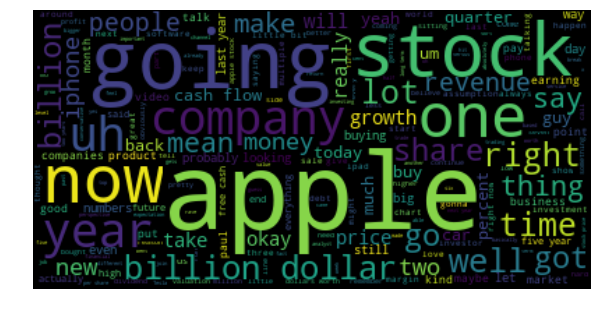

In [190]:

# Display the generated image:
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()